# TELECOM-CHURN CASE-STUDY- Salaj sinha and Arushi shree

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

In [2]:
#Model related packages 
import sklearn
from sklearn.model_selection import train_test_split # for splitting train & test data set
from sklearn.preprocessing import StandardScaler # for scaling
import statsmodels.api as sm_1 # for modelling
from statsmodels.stats.outliers_influence import variance_inflation_factor # for VIF computation
from sklearn.metrics import r2_score # for prediction
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
# Importing RFE and Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
#for pca
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
#for decison tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#for logistic with pca
from sklearn.pipeline import Pipeline
#random forest
from sklearn.ensemble import RandomForestClassifier


### IMPORTING AND UNDERSTANDING DATA SET

In [3]:
data = pd.read_csv('telecom_churn_data.csv')

In [4]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.3

In [5]:
data.shape

(99999, 226)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,...,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

In [8]:
num_cols=data.select_dtypes(include=['float64','int64']).columns.to_list()
cat_cols=data.select_dtypes(include=['object','category']).columns.to_list()
print('Numeric Variables',end='\n')
print(num_cols,end='\n')
print('*'*127)
print('Categorical Variables',end='\n')
print(cat_cols)

Numeric Variables
['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_m

`Although this doesnot shows the real picture cause there will be many categorical variables whose value is presented as numberic So we should try a different way`

In [9]:
col_name= data.columns
numerical = []
categorical = []
date_cols =[]
for cols in col_name:
    #We will find the all the unique values after dropping the NAN values
    uniq_vals_in_col = data[cols].dropna().unique()
    try:
        #If we are able to parse the column it basically means it date time else not
        parse(uniq_vals_in_col[0])
        print(f'{cols} is datetitme column')
        date_cols.append(cols)
    except:
        if uniq_vals_in_col.dtype == 'int64':
            print(f'{cols} is numerical')
            numerical.append(cols)
        elif len(uniq_vals_in_col) == len(data):
            #cause  all the data is unique then we can easily say it will be numerical
            print(f'This column {cols} is numerical')
            numerical.append(cols)
        elif len(uniq_vals_in_col) < len(data):
            #The below code is completely based on my observation
            if len(uniq_vals_in_col) <=10 and [i > float(int(i)) for i in uniq_vals_in_col if type(i)== np.float(64)].count(True)==0:
                print(f'This column {cols} may be categorical')
                categorical.append(cols)
            else:
                print(f'This column {cols} is numerical')
                numerical.append(cols)
        elif len([i for i in uniq_vals_in_col if type(i) == str]) > 0:
            print(f'This column {cols} is categorical')
            categorical.append(cols)
        else:
            print(f'This column {cols}is numerical')
            numerical.append(cols)

mobile_number is numerical
circle_id is numerical
This column loc_og_t2o_mou may be categorical
This column std_og_t2o_mou may be categorical
This column loc_ic_t2o_mou may be categorical
last_date_of_month_6 is datetitme column
last_date_of_month_7 is datetitme column
last_date_of_month_8 is datetitme column
last_date_of_month_9 is datetitme column
This column arpu_6 is numerical
This column arpu_7 is numerical
This column arpu_8 is numerical
This column arpu_9 is numerical
This column onnet_mou_6 is numerical
This column onnet_mou_7 is numerical
This column onnet_mou_8 is numerical
This column onnet_mou_9 is numerical
This column offnet_mou_6 is numerical
This column offnet_mou_7 is numerical
This column offnet_mou_8 is numerical
This column offnet_mou_9 is numerical
This column roam_ic_mou_6 is numerical
This column roam_ic_mou_7 is numerical
This column roam_ic_mou_8 is numerical
This column roam_ic_mou_9 is numerical
This column roam_og_mou_6 is numerical
This column roam_og_mou_7

In [10]:
numerical

['mobile_number',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_

In [11]:
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [12]:
categorical

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [13]:
#The date_time columns will not help us in classification hence dropping these columns
data.drop(columns=date_cols,axis=1,inplace=True)

### Null Values Treatment

In [14]:
pd.set_option("max_rows",None)
miss =(100*(data.isnull().sum()/len(data.index))).sort_values(ascending=False)

In [15]:
miss[miss>50]

night_pck_user_6      74.846748
fb_user_6             74.846748
count_rech_3g_6       74.846748
av_rech_amt_data_6    74.846748
max_rech_data_6       74.846748
total_rech_data_6     74.846748
arpu_3g_6             74.846748
arpu_2g_6             74.846748
count_rech_2g_6       74.846748
max_rech_data_7       74.428744
count_rech_2g_7       74.428744
arpu_3g_7             74.428744
fb_user_7             74.428744
count_rech_3g_7       74.428744
arpu_2g_7             74.428744
av_rech_amt_data_7    74.428744
night_pck_user_7      74.428744
total_rech_data_7     74.428744
arpu_3g_9             74.077741
total_rech_data_9     74.077741
arpu_2g_9             74.077741
max_rech_data_9       74.077741
night_pck_user_9      74.077741
fb_user_9             74.077741
av_rech_amt_data_9    74.077741
count_rech_3g_9       74.077741
count_rech_2g_9       74.077741
max_rech_data_8       73.660737
night_pck_user_8      73.660737
av_rech_amt_data_8    73.660737
arpu_2g_8             73.660737
count_re

`In some columns NAN have a meaning hence are retained. Others with null percentage greater than 50 are dropped`

In [16]:
#filling meaningfull missing with 0
exec=[data[i].fillna(0,inplace=True) for i in miss[miss>50].index]
del exec

In [17]:
#we wrote a function to extract columns based on skewness
skew_cols=[]

for col_name in data:
    try:
        if (data[col_name].value_counts(normalize=True).max()*100)>87.5:
            check=data[col_name].value_counts(normalize=True).max()*100
            print(f'This column {col_name}  is highly skewed and skewness% is {check}')
            skew_cols.append(col_name)
    except:
            print(f'error at {col_name}')

This column circle_id  is highly skewed and skewness% is 100.0
This column loc_og_t2o_mou  is highly skewed and skewness% is 100.0
This column std_og_t2o_mou  is highly skewed and skewness% is 100.0
This column loc_ic_t2o_mou  is highly skewed and skewness% is 100.0
This column std_og_t2f_mou_6  is highly skewed and skewness% is 87.91301451146136
This column std_og_t2f_mou_7  is highly skewed and skewness% is 88.63428333680051
This column std_og_t2f_mou_8  is highly skewed and skewness% is 88.51523446169455
This column std_og_t2f_mou_9  is highly skewed and skewness% is 88.72460814707222
This column std_og_t2c_mou_6  is highly skewed and skewness% is 100.0
This column std_og_t2c_mou_7  is highly skewed and skewness% is 100.0
This column std_og_t2c_mou_8  is highly skewed and skewness% is 100.0
This column std_og_t2c_mou_9  is highly skewed and skewness% is 100.0
This column isd_og_mou_6  is highly skewed and skewness% is 95.00426807686702
This column isd_og_mou_7  is highly skewed and 

### Imputation of rest null columns

### Median based imputation

In [18]:
#lets impute remaining columns which are not skewed with median
for col_name in data.columns:
    if col_name not in skew_cols:
        if data[col_name].isnull().any():
            print(f'This column {col_name} has nulls  and nature is numeric imputing with median metric')
            data[col_name].fillna(data[col_name].median(),inplace=True)

This column onnet_mou_6 has nulls  and nature is numeric imputing with median metric
This column onnet_mou_7 has nulls  and nature is numeric imputing with median metric
This column onnet_mou_8 has nulls  and nature is numeric imputing with median metric
This column onnet_mou_9 has nulls  and nature is numeric imputing with median metric
This column offnet_mou_6 has nulls  and nature is numeric imputing with median metric
This column offnet_mou_7 has nulls  and nature is numeric imputing with median metric
This column offnet_mou_8 has nulls  and nature is numeric imputing with median metric
This column offnet_mou_9 has nulls  and nature is numeric imputing with median metric
This column roam_ic_mou_6 has nulls  and nature is numeric imputing with median metric
This column roam_ic_mou_7 has nulls  and nature is numeric imputing with median metric
This column roam_ic_mou_8 has nulls  and nature is numeric imputing with median metric
This column roam_ic_mou_9 has nulls  and nature is nume

In [19]:
#let's see the final shape
data.shape

(99999, 214)

### Finding High Value Clients

In [20]:
data['avg_rech_amt_6_7'] = (data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [21]:
telecom_hvc=data[data['avg_rech_amt_6_7']>=data['avg_rech_amt_6_7'].quantile(0.7)]

In [22]:
telecom_hvc.shape

(30011, 215)

In [23]:
telecom_hvc['churn_value'] = telecom_hvc[['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)

In [24]:
telecom_hvc['churn_value']

7            0.00
8          177.09
13        1077.95
16         590.30
17         718.21
21        1284.14
24         957.81
33        5734.89
38         822.13
41         254.97
48        3213.82
53        1184.49
56        1325.93
57        5701.29
60         477.40
61         708.57
69         674.89
73        1879.62
74         805.31
77         120.62
87        1394.60
92        1544.04
96        1247.37
97           0.00
101       1015.95
102        455.09
103       2877.10
105       1646.89
111          0.00
115       2539.90
122        315.92
124        435.50
131        903.38
133       1831.40
134       1082.52
143          0.00
146       2069.34
147       1305.09
149       1417.87
154       2520.60
157       2751.40
158       3532.21
165        263.09
170       2218.41
171        476.21
173       2615.44
175        914.62
176        829.08
177       1904.30
184        614.87
185       1137.06
188          0.00
191         70.01
195       1121.21
199          0.00
203       

In [25]:
telecom_hvc['Churn'] = np.where(telecom_hvc['churn_value']==0, 1,0)
telecom_hvc.Churn.value_counts()
telecom_hvc.drop('churn_value',axis=1,inplace=True)

In [26]:
#lets drop columns which are skewed
telecom_hvc.drop(columns=skew_cols,axis=1,inplace=True)
#lets drop columns with '_9' in them
telecom_hvc.drop(columns=list(filter(lambda x :'_9' in x,telecom_hvc.columns)),axis=1,inplace=True)

In [27]:
#lets drop mobile number as it is of no use
telecom_hvc.drop('mobile_number',axis=1,inplace=True)
#lets see the shape after dropping those columns
print(telecom_hvc.shape)

(30011, 128)


### Exploratory Data Analysis

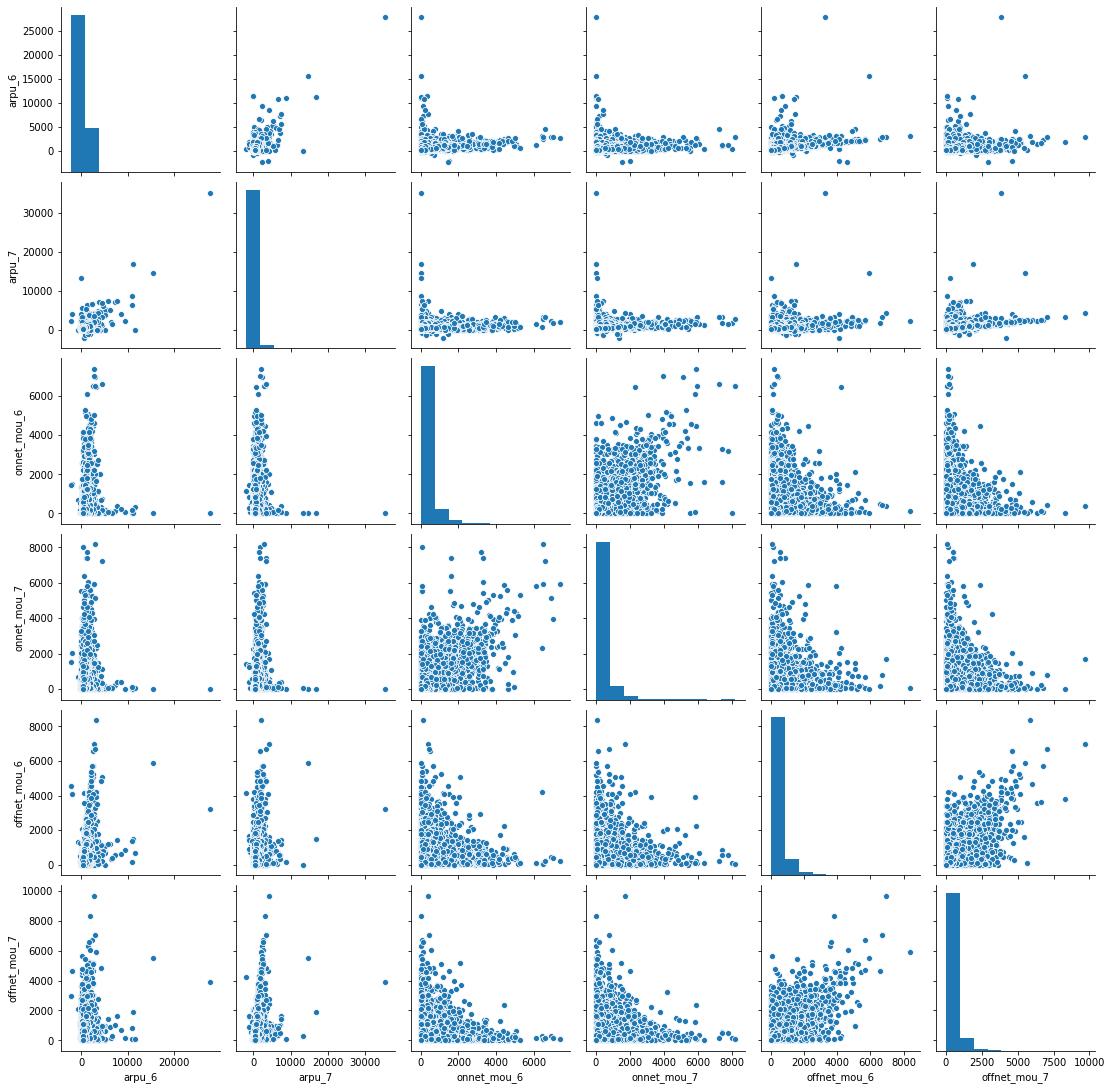

In [28]:
#plotting pairplot
sns.pairplot(telecom_hvc[['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7']])
plt.show()

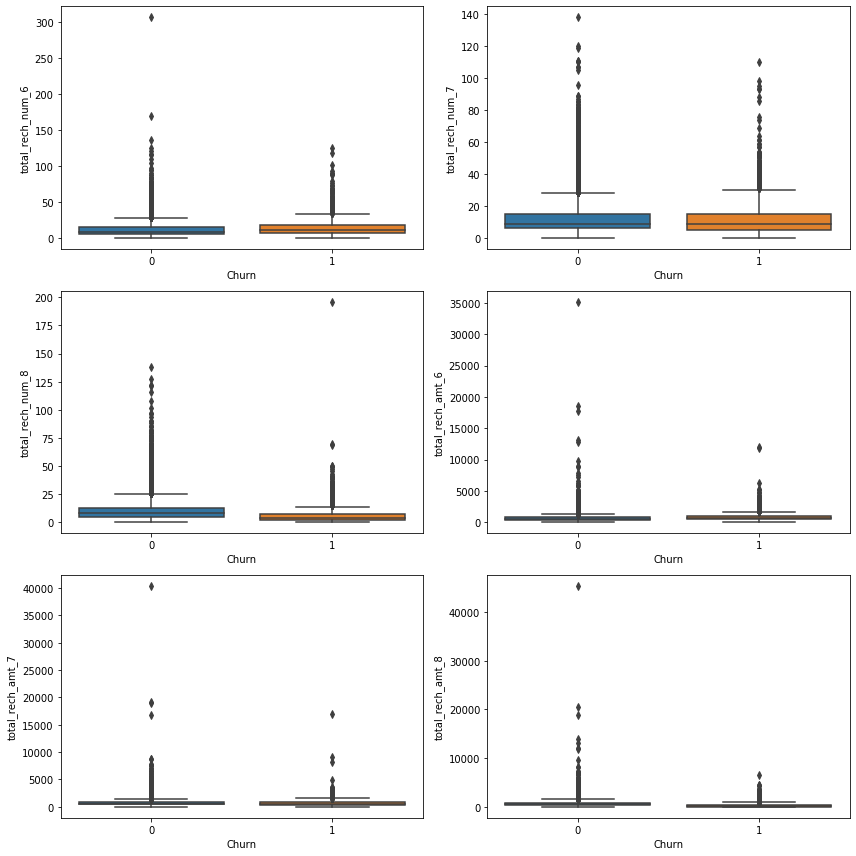

In [29]:
#box plot for total recharge columns
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.boxplot(x="Churn", y="total_rech_num_6", data=telecom_hvc)

plt.subplot(3,2,2)
sns.boxplot(x="Churn", y="total_rech_num_7", data=telecom_hvc) # loc_og_mou_6

plt.subplot(3,2,3)
sns.boxplot(x="Churn", y="total_rech_num_8", data=telecom_hvc)

plt.subplot(3,2,4)
sns.boxplot(x="Churn", y="total_rech_amt_6", data=telecom_hvc)

plt.subplot(3,2,5)
sns.boxplot(x="Churn", y="total_rech_amt_7", data=telecom_hvc)

plt.subplot(3,2,6)
sns.boxplot(x="Churn", y="total_rech_amt_8", data=telecom_hvc)


plt.tight_layout()

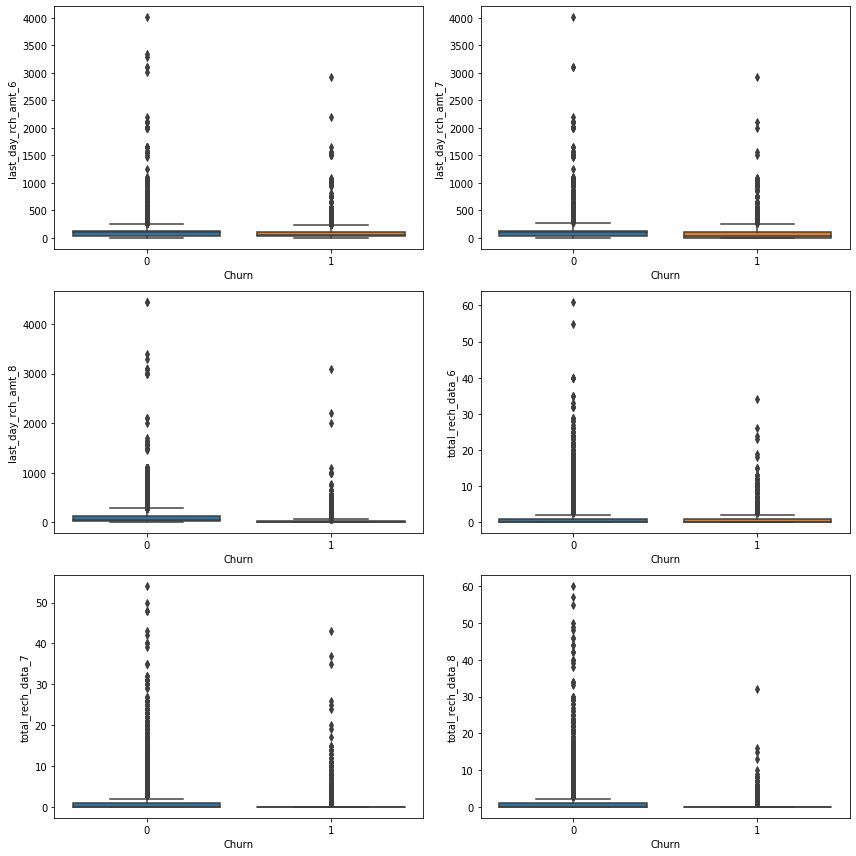

In [30]:
#box plots for few total recharge and last day recharge
plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
sns.boxplot(x="Churn", y="last_day_rch_amt_6", data=telecom_hvc)

plt.subplot(3,2,2)
sns.boxplot(x="Churn", y="last_day_rch_amt_7", data=telecom_hvc) 

plt.subplot(3,2,3)
sns.boxplot(x="Churn", y="last_day_rch_amt_8", data=telecom_hvc)

plt.subplot(3,2,4)
sns.boxplot(x="Churn", y="total_rech_data_6", data=telecom_hvc)

plt.subplot(3,2,5)
sns.boxplot(x="Churn", y="total_rech_data_7", data=telecom_hvc)

plt.subplot(3,2,6)
sns.boxplot(x="Churn", y="total_rech_data_8", data=telecom_hvc)


plt.tight_layout()

##### Around 91% of the High Value Customers don't Churn. 
##### As there is a he data imbalance in favour of non-churners the range of non-churners, with respect to just about any variable, whether Total data Recharge for month 7 or last day recharge amount for month 8, is greater than Churners.
##### There are only few isolated exceptions which may be termed outliers. 
##### One could cap the data between 5 and 95 percentiles or 1 and 99 percentiles
##### Many columns are sufficiently correlated to have their bivariate plots yield a somewhat straight line. Many plot resemble highly skewed Gaussian Curves while others follow no specific pattern, with points being randomly distributed.

### Data Cleaning

In [31]:
#as we saw outliers the below functions are written to cap those outliers
exec_count=0
def mapper(val,l_r,u_r):
    if val>u_r:
        return u_r
    elif val<l_r:
        return l_r
    return val
def cap_outliers(df):
    global exec_count
    if exec_count<1:
        for column in df.columns:
            if column!='mobile_number': 
                Q1,Q3 = np.quantile(df[column], [0.5,0.95])
                IQR=Q3-Q1
                lower_range = Q1
                upper_range = Q3
                df[column]=df[column].apply(lambda x:mapper(x,lower_range,upper_range))
            else:
                continue
        exec_count+=1
    else:
        print('You already used outlier cleaning once')

In [32]:
cap_outliers(telecom_hvc)

In [33]:
telecom_hvc.quantile([0.1,0.25,0.5,0.75,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,Churn
0.10,495.68200,493.56100,452.09100,125.830,125.4600,99.440,282.190,281.9400,240.940,0.0000,0.0000,0.0000,0.000,0.0000,0.000,32.5900,33.16,28.6400,101.2400,104.340,89.81,0.3300,0.4000,0.160,0.00,0.0000,0.00,166.310,170.4400,148.280,12.8300,13.350,5.9300,37.73,37.530,23.660,126.01,131.7300,72.89,0.21,0.780,0.49,0.00,510.2300,525.5800,435.3300,29.13,30.1300,26.8400,93.9400,96.8300,89.8100,1.96,2.2100,1.850,151.0600,154.8300,142.840,1.0500,1.200,0.560,7.08,7.4600,5.7100,0.00,0.00,0.00,15.030,16.110,12.5600,205.24,211.1900,193.440,0.00,0.0000,0.0000,0.0000,0.00,0.00,0.00,9.0,9.0,8.0,584.0,581.0,520.0,120.0,128.0,130.0,110.0,98.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.00,0.000,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,914.0,0.00,0.0000,0.000,568.5,0.0
0.25,495.68200,493.56100,452.09100,125.830,125.4600,99.440,282.190,281.9400,240.940,0.0000,0.0000,0.0000,0.000,0.0000,0.000,32.5900,33.16,28.6400,101.2400,104.340,89.81,0.3300,0.4000,0.160,0.00,0.0000,0.00,166.310,170.4400,148.280,12.8300,13.350,5.9300,37.73,37.530,23.660,126.01,131.7300,72.89,0.21,0.780,0.49,0.00,510.2300,525.5800,435.3300,29.13,30.1300,26.8400,93.9400,96.8300,89.8100,1.96,2.2100,1.850,151.0600,154.8300,142.840,1.0500,1.200,0.560,7.08,7.4600,5.7100,0.00,0.00,0.00,15.030,16.110,12.5600,205.24,211.1900,193.440,0.00,0.0000,0.0000,0.0000,0.00,0.00,0.00,9.0,9.0,8.0,584.0,581.0,520.0,120.0,128.0,130.0,110.0,98.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.00,0.000,0.0000,0.000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,914.0,0.00,0.0000,0.000,568.5,0.0
0.50,495.68200,493.56100,452.09100,125.830,125.4600,99.440,282.190,281.9400,240.940,0.0000,0.0000,0.0000,0.000,0.0000,0.000,32.5900,33.16,28.6400,101.2400,104.340,89.81,0.3300,0.4000,0.160,0.00,0.0000,0.00,166.310,170.4400,148.280,12.8300,13.350,5.9300,37.73,37.530,23.660,126.01,131.7300,72.89,0.21,0.780,0.49,0.00,510.2300,525.5800,435.3300,29.13,30.1300,26.8400,93.9400,96.8300,89.8100,1.96,2.2100,1.850,151.0600,154.8300,142.840,1.0500,1.200,0.560,7.08,7.4600,5.7100,0.00,0.00,0.00,15.030,16.110,12.5600,205.24,21

### Data Modelling

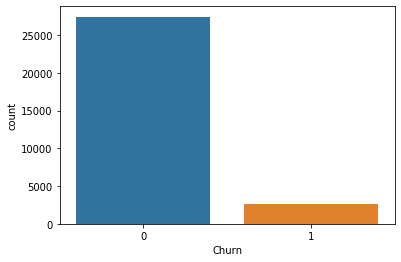

In [34]:
#dataimbalance
sns.countplot(telecom_hvc.Churn)

In [35]:
telecom_hvc.Churn.value_counts(normalize=True)*100

0    91.359835
1     8.640165
Name: Churn, dtype: float64

### Simple logistic Model

In [36]:
## split into train and test
X=telecom_hvc.drop(['Churn'],axis=1)
y=telecom_hvc['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [37]:
scaler=StandardScaler()
# Lets Fit on data
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
4715,-0.643504,-0.640367,-0.645301,0.112785,0.819025,0.555713,-0.620578,-0.623419,-0.624246,-0.379718,-0.354767,-0.361619,-0.389076,-0.366681,-0.36409,-0.572001,-0.571945,-0.576914,-0.637937,-0.635937,-0.641102,-0.531488,-0.534493,-0.536240,3.378875,-0.420259,-0.418791,-0.642506,-0.639409,-0.642701,0.612179,1.326225,1.053324,-0.234178,-0.483036,-0.286646,0.119757,0.428249,0.373901,3.044796,0.156512,-0.285711,-0.441432,-0.642989,-0.385478,-0.451873,-0.592152,-0.594375,-0.594101,-0.632694,-0.627990,-0.629135,-0.537915,-0.535789,-0.537366,-0.639493,-0.633394,-0.634075,3.198144,3.110972,3.213560,0.502080,1.031145,2.699394,-0.391481,-0.397618,-0.393097,1.388560,1.589959,2.708789,-0.634904,-0.629406,-0.630866,0.728322,-0.362936,-0.376120,-0.366223,-0.386736,-0.382219,-0.378880,0.987980,1.790882,2.312573,-0.647672,-0.643002,-0.647600,-0.56139,-0.551307,-0.557072,-0.44646,-0.586364,-0.755336,-0.629972,0.106492,-0.609519,-0.616522,-0.425836,-0.602382,-0.523185,0.418336,-0.510870,-0.603676,-0.489687,-0.60345,-0.413746,1.331506,-0.399952,-0.443958,-0.455555,-0.450110,-0.417129,-0.417602,-0.417915,-0.445281,-0.442350,-0.435037,-0.410243,0.554527,-0.426249,-0.721293,1.379101,-0.70005,-0.712246,-0.431266,-0.432417,-0.418085,-0.640287
15222,-0.643504,-0.572402,-0.524862,-0.599876,-0.599231,-0.471654,-0.620578,-0.623419,-0.624246,-0.379718,-0.354767,-0.361619,-0.389076,-0.366681,-0.36409,0.329562,-0.571945,0.691632,-0.024186,-0.635937,-0.499334,1.962888,2.775209,3.157673,-0.412438,-0.420259,-0.418791,0.077632,-0.639409,0.055635,-0.556920,-0.562163,-0.529065,-0.569810,-0.572052,-0.550544,-0.660554,-0.669619,-0.635241,0.218810,-0.331806,-0.213078,-0.441432,-0.642989,-0.647776,-0.641493,-0.592152,-0.594375,-0.401284,2.531089,0.520406,0.652740,3.181380,1.297034,3.167322,1.832686,0.091260,1.083008,-0.373524,-0.439274,-0.522846,-0.556933,-0.562019,-0.556911,-0.391481,-0.083603,-0.248841,-0.561925,-0.565588,-0.560485,1.289418,-0.198802,0.644407,-0.468688,0.329235,0.576930,0.566234,-0.386736,-0.382219,-0.378880,-0.653977,-0.644232,-0.615243,-0.647672,-0.431574,-0.647600,-0.56139,0.156510,0.238605,-0.44646,-0.352982,1.507035,-0.629972,0.106492,0.

In [38]:
logreg = LogisticRegression(class_weight ='balanced')
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [39]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False])

In [40]:
col = X_train.columns[rfe.support_]

In [41]:
#function for confusion matrix metrics
def complete_metrics(confusion_matrix):
    TP = confusion_matrix[1,1] # true positive 
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives
    sen=TP / float(TP+FN)
    spec=TN / float(TN+FP)
    acc=(TP+TN)/(TP+TN+FP+FN)
    fpr=FP/float(TN+FP)
    pp=TP /float(TP+FP)
    np=TN/float(TN+FN)
    print('Sensitivity ',sen)
    print('Recall',sen)
    print('Specificty ',spec)
    print('Accuracy ',acc)
    print('False positive rate ',fpr)
    print('Positive predictive value ',pp)
    print('Negative predictive value ',np)

In [42]:
X_train_sm = sm_1.add_constant(X_train[col])
logm2 = sm_1.GLM(y_train,X_train_sm, family = sm_1.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4345.9
Date:                Mon, 18 Jan 2021   Deviance:                       8691.9
Time:                        12:52:46   Pearson chi2:                 6.77e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8482      0.066    -58.024      0.000      -3.978      -3.718
loc_og_t2t_mou_8      -0.9465      0.077    -12.274      0.000      -1.098      -0.795
loc_og_t2m_mou_8      -0.8886      0.080    -11.154      0.000      -1.045      -0.732
std_og_mou_8          -1.4217      0.084    -16.977      0.000      -1.586      -1.258
total_og_mou_8         0.9059      0.093      9.705      0.000       0.723       1.089
loc_ic_t2m_mou_8      -0.6021      0.083     -7.285      0.000      -0.764      -0.440
loc_ic_t2f_mou_8      -0.6163      0.072     -8.563      0.000      -0.757      -0.475
total_rech_num_8      -0.4540      0.046     -9.838      0.000      -0.544      -0.364
total_rech_amt_6       0.3169      0.029     11.015      0.000       0.261       0.373
total_rech_amt_7       0.3174      0.033      9.474      0.000       0.252       0.383
last_day_rch_amt_8    -0.6790      0.047    -14.454      0.000      -0.771      -0.587
count_rech_2g_6       -0.3457      0.103     -3.340      0.001      -0.548      -0.143
count_rech_2g_8       -0.8016      0.241     -3.319      0.001      -1.275      -0.328
av_rech_amt_data_8    -0.6941      0.059    -11.811      0.000      -0.809      -0.579
sachet_2g_6            0.3927      0.100      3.912      0.000       0.196       0.589
sachet_2g_8            0.5984      0.233      2.564      0.010       0.141       1.056
======================================================================================
"""

In [43]:
#predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.035005
1,0,0.000233
2,0,0.021713
3,0,0.028971
4,0,0.228118


In [44]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.035005,0
1,0,0.000233,0
2,0,0.021713,0
3,0,0.028971,0
4,0,0.228118,0


In [45]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[18054  1130]
 [  752  1071]]


In [46]:
complete_metrics(confusion)

Sensitivity  0.5874931431705979
Recall 0.5874931431705979
Specificty  0.9410967472894078
Accuracy  0.9104108154424716
False positive rate  0.05890325271059216
Positive predictive value  0.4865970013630168
Negative predictive value  0.9600127618845049


In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,count_rech_2g_8,15.75
14,sachet_2g_8,14.70
10,count_rech_2g_6,7.79
13,sachet_2g_6,7.53
3,total_og_mou_8,7.21
2,std_og_mou_8,6.52
1,loc_og_t2m_mou_8,2.44
4,loc_ic_t2m_mou_8,1.79
8,total_rech_amt_7,1.67
0,loc_og_t2t_mou_8,1.64


In [48]:
# Value of VIF for count_rech_2g_8 is high
# So lets delete it.
col = col.drop('count_rech_2g_8', 1)

In [49]:
# Let's re-run the model using the selected variables
X_train_sm = sm_1.add_constant(X_train[col])
logm2 = sm_1.GLM(y_train,X_train_sm, family = sm_1.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4352.3
Date:                Mon, 18 Jan 2021   Deviance:                       8704.6
Time:                        12:52:47   Pearson chi2:                 6.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8335      0.066    -58.293      0.000      -3.962      -3.705
loc_og_t2t_mou_8      -0.9485      0.077    -12.303      0.000      -1.100      -0.797
loc_og_t2m_mou_8      -0.8921      0.080    -11.208      0.000      -1.048      -0.736
std_og_mou_8          -1.4269      0.084    -17.039      0.000      -1.591      -1.263
total_og_mou_8         0.9088      0.093      9.736      0.000       0.726       1.092
loc_ic_t2m_mou_8      -0.6043      0.083     -7.322      0.000      -0.766      -0.443
loc_ic_t2f_mou_8      -0.6191      0.072     -8.595      0.000      -0.760      -0.478
total_rech_num_8      -0.4537      0.046     -9.829      0.000      -0.544      -0.363
total_rech_amt_6       0.3203      0.029     11.135      0.000       0.264       0.377
total_rech_amt_7       0.3197      0.034      9.536      0.000       0.254       0.385
last_day_rch_amt_8    -0.6821      0.047    -14.475      0.000      -0.774      -0.590
count_rech_2g_6       -0.4554      0.099     -4.592      0.000      -0.650      -0.261
av_rech_amt_data_8    -0.7786      0.058    -13.507      0.000      -0.892      -0.666
sachet_2g_6            0.4894      0.097      5.055      0.000       0.300       0.679
sachet_2g_8           -0.1516      0.050     -3.016      0.003      -0.250      -0.053
======================================================================================
"""

In [50]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.034875
1,0,0.000411
2,0,0.021561
3,0,0.028790
4,0,0.228282


In [51]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.034875,0
1,0,0.000411,0
2,0,0.021561,0
3,0,0.028790,0
4,0,0.228282,0


In [52]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[18057  1127]
 [  756  1067]]


In [53]:
# Let's check the overall metrics.
complete_metrics(confusion)

Sensitivity  0.5852989577619309
Recall 0.5852989577619309
Specificty  0.9412531276063386
Accuracy  0.9103632122625791
False positive rate  0.05874687239366139
Positive predictive value  0.4863263445761167
Negative predictive value  0.9598150215276671


In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,7.21
2,std_og_mou_8,6.52
12,sachet_2g_6,6.26
10,count_rech_2g_6,6.12
1,loc_og_t2m_mou_8,2.44
4,loc_ic_t2m_mou_8,1.79
8,total_rech_amt_7,1.66
0,loc_og_t2t_mou_8,1.64
13,sachet_2g_8,1.54
7,total_rech_amt_6,1.41


In [55]:
# Value of VIF for total_og_mou_8 is  high
# So lets dropping it.
col = col.drop('total_og_mou_8', 1)

In [56]:
# Let's re-run the model using the selected variables
X_train_sm = sm_1.add_constant(X_train[col])
logm3 = sm_1.GLM(y_train,X_train_sm, family = sm_1.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4392.2
Date:                Mon, 18 Jan 2021   Deviance:                       8784.5
Time:                        12:52:49   Pearson chi2:                 7.43e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8352      0.067    -57.638      0.000      -3.966      -3.705
loc_og_t2t_mou_8      -0.7264      0.076     -9.530      0.000      -0.876      -0.577
loc_og_t2m_mou_8      -0.6953      0.081     -8.558      0.000      -0.855      -0.536
std_og_mou_8          -0.7308      0.044    -16.640      0.000      -0.817      -0.645
loc_ic_t2m_mou_8      -0.6170      0.084     -7.366      0.000      -0.781      -0.453
loc_ic_t2f_mou_8      -0.6321      0.073     -8.677      0.000      -0.775      -0.489
total_rech_num_8      -0.4585      0.046     -9.890      0.000      -0.549      -0.368
total_rech_amt_6       0.3531      0.028     12.394      0.000       0.297       0.409
total_rech_amt_7       0.3465      0.033     10.437      0.000       0.281       0.412
last_day_rch_amt_8    -0.6807      0.047    -14.451      0.000      -0.773      -0.588
count_rech_2g_6       -0.4334      0.099     -4.378      0.000      -0.627      -0.239
av_rech_amt_data_8    -0.7719      0.058    -13.400      0.000      -0.885      -0.659
sachet_2g_6            0.4831      0.097      4.999      0.000       0.294       0.673
sachet_2g_8           -0.1692      0.050     -3.376      0.001      -0.267      -0.071
======================================================================================
"""

In [57]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.049885
1,0,0.000464
2,0,0.029992
3,0,0.031129
4,0,0.219839


In [58]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.049885,0
1,0,0.000464,0
2,0,0.029992,0
3,0,0.031129,0
4,0,0.219839,0


In [59]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[18237   947]
 [  935   888]]


In [60]:
# Let's check the overall metrics.
complete_metrics(confusion)

Sensitivity  0.48710916072408117
Recall 0.48710916072408117
Specificty  0.9506359466221852
Accuracy  0.9104108154424716
False positive rate  0.04936405337781485
Positive predictive value  0.48392370572207083
Negative predictive value  0.9512309618193199


In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,sachet_2g_6,6.26
9,count_rech_2g_6,6.12
1,loc_og_t2m_mou_8,1.88
3,loc_ic_t2m_mou_8,1.78
7,total_rech_amt_7,1.63
12,sachet_2g_8,1.54
2,std_og_mou_8,1.42
6,total_rech_amt_6,1.40
5,total_rech_num_8,1.38
10,av_rech_amt_data_8,1.38


In [62]:
# Value of p for sachet_2g_6 is high
# So lets delete it.
col = col.drop('sachet_2g_6', 1)

In [63]:
# Let's re-run the model using the selected variables
X_train_sm = sm_1.add_constant(X_train[col])
logm4 = sm_1.GLM(y_train,X_train_sm, family = sm_1.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4406.5
Date:                Mon, 18 Jan 2021   Deviance:                       8812.9
Time:                        12:52:50   Pearson chi2:                 8.19e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8333      0.067    -57.501      0.000      -3.964      -3.703
loc_og_t2t_mou_8      -0.7275      0.076     -9.539      0.000      -0.877      -0.578
loc_og_t2m_mou_8      -0.6968      0.081     -8.570      0.000      -0.856      -0.537
std_og_mou_8          -0.7278      0.044    -16.588      0.000      -0.814      -0.642
loc_ic_t2m_mou_8      -0.6258      0.084     -7.451      0.000      -0.790      -0.461
loc_ic_t2f_mou_8      -0.6432      0.073     -8.784      0.000      -0.787      -0.500
total_rech_num_8      -0.4498      0.046     -9.723      0.000      -0.540      -0.359
total_rech_amt_6       0.3529      0.028     12.406      0.000       0.297       0.409
total_rech_amt_7       0.3490      0.033     10.524      0.000       0.284       0.414
last_day_rch_amt_8    -0.6833      0.047    -14.490      0.000      -0.776      -0.591
count_rech_2g_6        0.0231      0.032      0.710      0.478      -0.041       0.087
av_rech_amt_data_8    -0.8306      0.058    -14.325      0.000      -0.944      -0.717
sachet_2g_8           -0.1246      0.049     -2.553      0.011      -0.220      -0.029
======================================================================================
"""

In [64]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.050488
1,0,0.000394
2,0,0.029631
3,0,0.031041
4,0,0.217617


In [65]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.050488,0
1,0,0.000394,0
2,0,0.029631,0
3,0,0.031041,0
4,0,0.217617,0


In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[18260   924]
 [  930   893]]


In [67]:
# Let's check the overall metrics.
complete_metrics(confusion)

Sensitivity  0.48985189248491495
Recall 0.48985189248491495
Specificty  0.9518348623853211
Accuracy  0.9117437044794592
False positive rate  0.0481651376146789
Positive predictive value  0.4914694551458448
Negative predictive value  0.9515372589890568


In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_t2m_mou_8,1.88
3,loc_ic_t2m_mou_8,1.78
7,total_rech_amt_7,1.63
11,sachet_2g_8,1.45
2,std_og_mou_8,1.42
6,total_rech_amt_6,1.40
5,total_rech_num_8,1.37
9,count_rech_2g_6,1.34
10,av_rech_amt_data_8,1.33
8,last_day_rch_amt_8,1.32


In [69]:
#based on p value dropping it
col = col.drop('count_rech_2g_6', 1)

In [70]:
# Let's re-run the model using the selected variables
X_train_sm = sm_1.add_constant(X_train[col])
logm5 = sm_1.GLM(y_train,X_train_sm, family = sm_1.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4406.7
Date:                Mon, 18 Jan 2021   Deviance:                       8813.4
Time:                        12:52:51   Pearson chi2:                 8.14e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8327      0.067    -57.507      0.000      -3.963      -3.702
loc_og_t2t_mou_8      -0.7286      0.076     -9.548      0.000      -0.878      -0.579
loc_og_t2m_mou_8      -0.6982      0.081     -8.587      0.000      -0.858      -0.539
std_og_mou_8          -0.7298      0.044    -16.663      0.000      -0.816      -0.644
loc_ic_t2m_mou_8      -0.6249      0.084     -7.443      0.000      -0.789      -0.460
loc_ic_t2f_mou_8      -0.6426      0.073     -8.780      0.000      -0.786      -0.499
total_rech_num_8      -0.4497      0.046     -9.725      0.000      -0.540      -0.359
total_rech_amt_6       0.3539      0.028     12.455      0.000       0.298       0.410
total_rech_amt_7       0.3478      0.033     10.500      0.000       0.283       0.413
last_day_rch_amt_8    -0.6842      0.047    -14.519      0.000      -0.777      -0.592
av_rech_amt_data_8    -0.8252      0.057    -14.386      0.000      -0.938      -0.713
sachet_2g_8           -0.1142      0.046     -2.460      0.014      -0.205      -0.023
======================================================================================
"""

In [71]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.050769
1,0,0.000400
2,0,0.029714
3,0,0.031140
4,0,0.218959


In [72]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.1 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.050769,0
1,0,0.000400,0
2,0,0.029714,0
3,0,0.031140,0
4,0,0.218959,1


In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[15184  4000]
 [  345  1478]]


In [74]:
# Let's check the overall metrics.
complete_metrics(confusion)

Sensitivity  0.8107515085024685
Recall 0.8107515085024685
Specificty  0.7914929107589658
Accuracy  0.793164183367449
False positive rate  0.2085070892410342
Positive predictive value  0.2698064987221614
Negative predictive value  0.977783501835276


In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_t2m_mou_8,1.88
3,loc_ic_t2m_mou_8,1.78
7,total_rech_amt_7,1.63
2,std_og_mou_8,1.41
6,total_rech_amt_6,1.39
5,total_rech_num_8,1.37
8,last_day_rch_amt_8,1.32
9,av_rech_amt_data_8,1.29
0,loc_og_t2t_mou_8,1.24
10,sachet_2g_8,1.22


In [76]:
#plotting roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

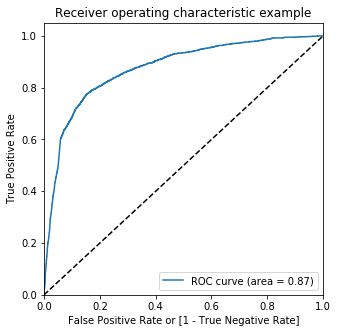

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [78]:
#find optimal cutoff 
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.050769,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000400,0,1,0,0,0,0,0,0,0,0,0
2,0,0.029714,0,1,0,0,0,0,0,0,0,0,0
3,0,0.031140,0,1,0,0,0,0,0,0,0,0,0
4,0,0.218959,1,1,1,1,0,0,0,0,0,0,0


In [79]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086781  1.000000  0.000000
0.1   0.1  0.793164  0.810752  0.791493
0.2   0.2  0.878136  0.699945  0.895069
0.3   0.3  0.911553  0.477784  0.952773
0.4   0.4  0.916885  0.247943  0.980452
0.5   0.5  0.916980  0.131651  0.991608
0.6   0.6  0.914457  0.049369  0.996664
0.7   0.7  0.914029  0.023587  0.998645
0.8   0.8  0.913600  0.007680  0.999687
0.9   0.9  0.913219  0.000000  1.000000


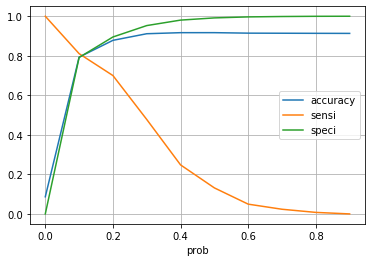

In [80]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

`Cut-off is 0.1`

In [81]:
from sklearn.metrics import precision_score, recall_score
prec=precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
rec=recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print('Precision Score ',prec)
print('Recall Score ',rec)
print('F1 score ',2*((prec*rec)/(prec+rec)))

Precision Score  0.2698064987221614
Recall Score  0.8107515085024685
F1 score  0.40487604437748254


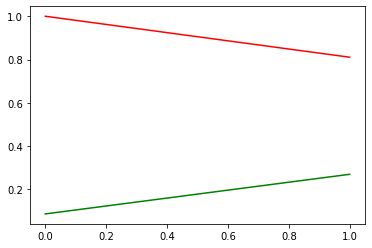

In [82]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Let's predict on test data

In [83]:
X_test.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_2g_7', 'sachet_2g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_6_7'],
      dtype='object', length=127)

In [84]:
# Lets Fit on data
X_test[X_test.columns]= scaler.transform(X_test[X_test.columns])
X_test_sm=X_test[col]
X_test_sm.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,last_day_rch_amt_8,av_rech_amt_data_8,sachet_2g_8
29360,-0.576914,-0.641102,-0.635241,-0.126418,-0.054759,-0.615243,0.996299,-0.643002,-0.755336,-0.603450,-0.426249
49979,-0.469498,-0.641102,-0.162786,-0.629135,-0.537366,-0.615243,-0.097115,0.065466,2.301922,-0.603450,-0.426249
90612,-0.576914,-0.641102,-0.635241,0.096820,-0.442649,-0.615243,-0.539871,-0.643002,2.332495,2.877578,-0.426249
87007,-0.576914,0.121242,-0.635241,0.792726,-0.302828,2.829247,-0.593771,-0.464958,-0.755336,-0.603450,-0.426249
91852,3.084204,-0.641102,-0.635241,-0.220426,-0.343421,-0.098570,-0.647672,-0.643002,-0.755336,-0.603450,-0.426249


In [85]:
X_test_sm = sm_1.add_constant(X_test_sm)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

29360    0.285412
49979    0.049782
90612    0.001766
87007    0.019556
91852    0.015444
28100    0.029053
69301    0.342803
50905    0.028425
31097    0.033386
83157    0.456611
dtype: float64

In [86]:
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Prob'})
y_pred_final['final_predicted'] = y_pred_final.Prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,Churn,Prob,final_predicted
29360,0,0.285412,1
49979,0,0.049782,0
90612,0,0.001766,0
87007,0,0.019556,0
91852,0,0.015444,0


In [87]:
confusion_test= metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion_test

array([[6518, 1716],
       [ 136,  634]], dtype=int64)

In [88]:
# Let's check the overall metrics.
complete_metrics(confusion_test)

Sensitivity  0.8233766233766234
Recall 0.8233766233766234
Specificty  0.7915958222006315
Accuracy  0.7943136383829409
False positive rate  0.20840417779936848
Positive predictive value  0.26978723404255317
Negative predictive value  0.97956116621581


### PRINCIPAL COMPONENT ANALYSIS

In [89]:
pca = PCA(random_state=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
pca.components_

array([[ 5.08181511e-02,  5.49492002e-02,  6.29632269e-02, ...,
         1.43785695e-01,  1.38096184e-01,  5.94083134e-02],
       [ 9.88357392e-02,  1.06449093e-01,  1.06420462e-01, ...,
        -6.60021812e-02, -6.43399335e-02,  1.17289653e-01],
       [ 1.55738325e-01,  1.88048009e-01,  1.75572162e-01, ...,
         5.48304091e-02,  4.93305975e-02,  1.87187678e-01],
       ...,
       [ 2.48952111e-03,  1.14231245e-02,  1.04167130e-03, ...,
         1.16537437e-03,  1.00530620e-04, -5.47357833e-03],
       [ 1.52912008e-03, -2.40193729e-03, -2.54639561e-03, ...,
        -2.43739301e-03,  8.60487093e-04,  1.23786713e-02],
       [-3.32543374e-03,  3.72243918e-03, -4.99939152e-03, ...,
        -7.47997127e-05, -6.04332402e-05, -3.53658259e-03]])

In [91]:
pca.explained_variance_ratio_

array([1.45375553e-01, 1.08079680e-01, 8.59581529e-02, 5.49957290e-02,
       4.74124122e-02, 3.64786386e-02, 2.96642435e-02, 2.66600579e-02,
       2.45309489e-02, 2.15861375e-02, 2.02051131e-02, 1.98266597e-02,
       1.85355064e-02, 1.58505531e-02, 1.52752229e-02, 1.44727145e-02,
       1.37561577e-02, 1.35374849e-02, 1.20044269e-02, 1.18336409e-02,
       1.01153067e-02, 9.82449115e-03, 9.64472018e-03, 9.11370860e-03,
       8.42108756e-03, 8.13519223e-03, 7.98848930e-03, 7.27253187e-03,
       7.16500897e-03, 6.95094362e-03, 6.84036218e-03, 6.66650547e-03,
       6.46274716e-03, 5.98757982e-03, 5.95612205e-03, 5.70141749e-03,
       5.29550162e-03, 5.01606280e-03, 4.88158161e-03, 4.83194769e-03,
       4.82107804e-03, 4.51733324e-03, 4.48436813e-03, 4.33933839e-03,
       4.13817901e-03, 3.91483291e-03, 3.80143816e-03, 3.67246621e-03,
       3.54775661e-03, 3.20238086e-03, 2.98093931e-03, 2.74846581e-03,
       2.59250552e-03, 2.54476269e-03, 2.52323599e-03, 2.46910900e-03,
      

In [92]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

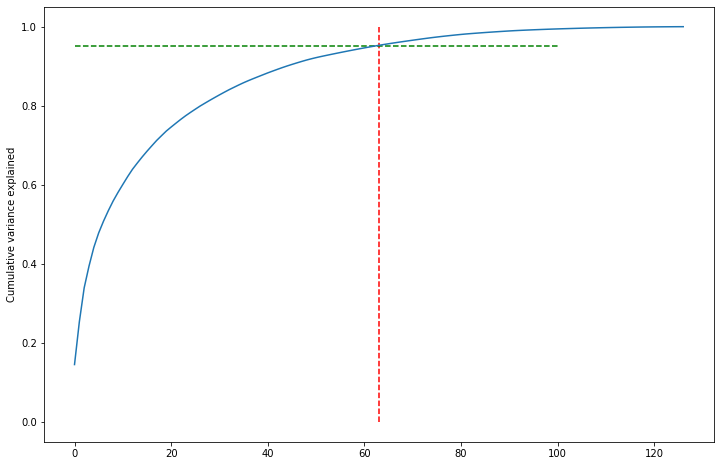

In [93]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=63, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [94]:
pca_final = IncrementalPCA(n_components=63)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21007, 63)

In [95]:
pd.DataFrame(df_train_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,-3.969884,-1.331946,1.925521,0.834029,4.971428,2.827737,-1.690583,0.790091,-0.646085,1.536163,1.525371,-2.062312,-2.629381,0.902373,0.951385,-0.811214,0.699708,0.344833,0.875895,-1.262861,-0.142897,0.915867,0.714378,1.369693,-1.361816,0.883105,-3.153782,1.004880,-1.414278,-1.416091,1.040097,-0.649157,-1.770089,-0.937370,1.072578,0.756889,0.568234,0.236805,-0.518502,-0.025312,0.268357,-0.150154,0.289170,-0.550916,-0.863912,0.401083,0.244847,0.401743,-0.422831,0.285387,0.297370,-0.329592,0.907920,0.287798,-0.507500,0.580532,-0.303028,0.145669,-0.239539,0.716808,-0.001125,0.448511,-0.747502
1,3.118403,0.415154,-4.220781,-0.560320,0.151047,0.334978,-1.201807,-2.564137,2.534165,0.539000,-2.521408,-0.151041,1.038618,-2.220906,-0.990162,-0.924257,0.478750,1.090845,-0.013904,-2.897962,0.290143,0.636063,1.556811,-0.417315,0.320983,0.550226,0.309168,1.038004,-0.026652,-0.537689,-0.786964,-0.872071,-0.338756,-0.554581,-0.738496,-0.012729,-2.056540,1.131581,-1.084483,0.031181,0.548900,-0.144856,-0.294732,-0.910793,-0.410735,0.449012,0.502894,-1.503653,0.449531,0.603062,0.213537,-0.053590,0.445956,-0.786137,-0.941441,-0.798897,-0.273275,-0.112468,0.110973,-0.215677,0.249571,-0.401878,-0.071836
2,-0.786966,2.271948,-3.419888,-0.103046,-0.138359,-1.169509,-0.603379,-0.779390,-0.291403,1.194308,1.163943,5.548154,-1.498443,0.875066,1.195847,-0.750769,0.200736,-0.027131,-3.505669,-2.133520,-0.306169,-0.886348,-0.005557,-0.262503,-0.194829,0.451130,-0.427638,-0.625617,0.996390,0.169795,0.821242,0.325138,-0.095033,0.907584,0.608857,0.293433,0.532116,-0.348495,0.360199,-0.112645,-0.131845,-0.286283,-0.161679,0.182780,-0.025316,-0.192220,-0.583196,1.445448,0.155250,-0.450421,0.238088,-0.274761,-0.104682,-0.240653,0.128668,0.138864,0.265172,0.113679,-0.238634,0.175498,-0.631992,0.067046,0.468451
3,-3.505186,1.188479,-0.039414,-0.246741,0.108904,-2.165318,-0.720442,-0.285578,-1.809861,-2.234232,2.019108,-0.868607,0.183479,-1.488889,0.835982,0.283719,1.351918,0.328055,-0.407056,-0.698238,-0.314060,-0.283574,0.179672,-1.124677,0.305316,-1.301836,-0.723006,0.150465,-0.957705,-0.388381,0.335653,0.778414,0.476412,0.874072,0.872378,0.143218,-1.424038,-0.076591,0.393831,-0.261423,0.038239,-0.131784,-0.071721,0.164609,-0.160267,0.824665,-0.822000,1.319268,-0.015205,0.372084,-0.391034,-0.125927,-1.109670,0.501832,0.573683,0.747325,-0.328165,1.107224,-0.286585,-0.140688,-0.059611,-0.256923,-0.643439
4,-3.312147,-0.670130,-1.410101,-0.232451,1.362542,-0.715473,-1.289095,1.457166,0.387674,0.748007,0.807507,1.636294,-1.475654,-1.449625,1.245778,-0.235874,1.371434,1.068277,1.285928,1.708077,0.152591,0.108437,-0.651377,-0.758213,-0.072417,0.457028,0.258122,-0.733454,0.418713,-0.406055,0.074579,-0.123810,-1.623501,0.461720,1.320440,-0.187247,0.584165,0.914959,-0.597690,0.358672,-0.656457,2.017850,0.013403,-0.303561,0.509791,-0.665722,0.009529,-1.302382,-0.043929,1.923581,0.118324,1.517967,-0.502556,-0.846732,-0.321851,0.376901,-0.314487,0.774960,0.186302,-0.256801,-0.406884,-0.633156,-0.681383


In [96]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 63)

### Decision Tree with PCA

In [97]:
dt_default = DecisionTreeClassifier(max_depth=5,class_weight='balanced')  #max_depth=5
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test_dc = pd.DataFrame(data=df_test_pca)
y_pred_default = dt_default.predict(X_test_dc)
X_train_dc=pd.DataFrame(data=df_train_pca)
# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8234
           1       0.26      0.75      0.39       770

    accuracy                           0.80      9004
   macro avg       0.62      0.78      0.63      9004
weighted avg       0.91      0.80      0.84      9004



In [99]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train_dc.columns, 
                    class_names=['Churn', "No Churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [100]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [101]:
cm_default_dt_pca =confusion_matrix(y_test,y_pred_default)
cm_default_dt_pca


array([[6605, 1629],
       [ 193,  577]], dtype=int64)

In [102]:
complete_metrics(cm_default_dt_pca)

Sensitivity  0.7493506493506493
Recall 0.7493506493506493
Specificty  0.8021617682778722
Accuracy  0.7976454908929365
False positive rate  0.19783823172212775
Positive predictive value  0.2615593834995467
Negative predictive value  0.9716092968520152


### Hyper-parameter tunning of the decision treem

In [103]:
params = {
    'max_depth': [3,5],
    'min_samples_leaf': [50,70],
    'min_samples_split':[50,70],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = params, 
                          cv = n_folds, verbose = 1,scoring = "recall")

# # Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   44.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [104]:
# cv results
scores_dt_pca = pd.DataFrame(grid_search.cv_results_)
scores_dt_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.503711,0.020345,0.009396,0.003772,entropy,3,50,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.824658,0.805479,0.829670,0.793956,0.789041,0.808561,0.016177,5
1,0.486720,0.029479,0.007005,0.001543,entropy,3,50,70,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.824658,0.805479,0.829670,0.793956,0.789041,0.808561,0.016177,5
2,0.480531,0.012094,0.005994,0.000009,entropy,3,70,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.824658,0.805479,0.829670,0.793956,0.789041,0.808561,0.016177,5
3,0.524496,0.045702,0.007000,0.000627,entropy,3,70,70,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.824658,0.805479,0.829670,0.793956,0.789041,0.808561,0.016177,5
4,0.844319,0.070292,0.008400,0.003002,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.819178,0.734247,0.799451,0.791209,0.769863,0.782789,0.028969,13


In [105]:
# printing the optimal accuracy score and hyperparameters for dt with pca
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8222745747403282
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [106]:
# model with optimal hyperparameters
clf_ent = DecisionTreeClassifier(criterion = "entropy",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_ent.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')

In [107]:
# Making predictions
X_test_dc = pd.DataFrame(data=df_test_pca)
y_pred_dc = clf_ent.predict(X_test_dc)

# Printing classification report
print(classification_report(y_test, y_pred_dc))

              precision    recall  f1-score   support

           0       0.98      0.60      0.75      8234
           1       0.17      0.84      0.28       770

    accuracy                           0.63      9004
   macro avg       0.57      0.72      0.51      9004
weighted avg       0.91      0.63      0.71      9004



In [108]:
pca_dt_test_cm =confusion_matrix(y_test,y_pred_dc)

In [109]:
complete_metrics(pca_dt_test_cm)

Sensitivity  0.8441558441558441
Recall 0.8441558441558441
Specificty  0.6049307748360456
Accuracy  0.6253887161261662
False positive rate  0.3950692251639543
Positive predictive value  0.16653856008198822
Negative predictive value  0.9764752009409919


### Random Forest Using PCA

In [110]:

rf = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# fit
rf.fit(df_train_pca,y_train)
#predictions using random forest
y_pred_rf_pca = rf.predict(df_train_pca)

In [111]:
confusion_rf_train=metrics.confusion_matrix(y_train, y_pred_rf_pca)
confusion_rf_train

array([[19184,     0],
       [    1,  1822]], dtype=int64)

In [112]:
complete_metrics(confusion_rf_train)

Sensitivity  0.9994514536478333
Recall 0.9994514536478333
Specificty  1.0
Accuracy  0.9999523968201076
False positive rate  0.0
Positive predictive value  1.0
Negative predictive value  0.9999478759447485


In [113]:
y_pred_rf_test_pca=rf.predict(df_test_pca)
confusion_rf_test=metrics.confusion_matrix(y_test,y_pred_rf_test_pca)

In [114]:
complete_metrics(confusion_rf_test)

Sensitivity  0.11038961038961038
Recall 0.11038961038961038
Specificty  0.995384989069711
Accuracy  0.9197023545091071
False positive rate  0.004615010930289046
Positive predictive value  0.6910569105691057
Negative predictive value  0.9228690462785722


In [115]:
confusion_rf_test

array([[8196,   38],
       [ 685,   85]], dtype=int64)

In [116]:
#sensitivity is less going for hyper parameter tuning
#Create the parameter grid 
params = {
    'max_depth': [3],
    'min_samples_leaf': [50,70],
    'min_samples_split':[50,70],
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
forest = RandomForestClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = forest, param_grid = params, 
                          cv = n_folds, verbose = 1,scoring = "recall")

# # Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [117]:
# cv results
scores_rf_pca = pd.DataFrame(grid_search.cv_results_)
scores_rf_pca.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.656705,0.546376,0.051770,0.000983,entropy,3,50,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.783562,0.712329,0.750000,0.755495,0.734247,0.747126,0.023591,1
1,6.669857,0.342556,0.062365,0.017317,entropy,3,50,70,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.758904,0.706849,0.752747,0.722527,0.726027,0.733411,0.019505,8
2,6.604590,0.373561,0.058371,0.010567,entropy,3,70,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.736986,0.736986,0.752747,0.725275,0.736986,0.737796,0.008744,6
3,6.352967,0.220889,0.055972,0.006321,entropy,3,70,70,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.780822,0.687671,0.739011,0.755495,0.747945,0.742189,0.030610,4
4,4.004510,0.091985,0.054773,0.007325,gini,3,50,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.736986,0.706849,0.755495,0.750000,0.728767,0.735619,0.017195,7


In [118]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7471262983591751
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [119]:
# model with optimal hyperparameters
clf_ent_rf = RandomForestClassifier(criterion = "entropy",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=70)
clf_ent_rf.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [120]:
# model with optimal hyperparameters
clf_ent_rf = RandomForestClassifier(criterion = "entropy",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=70)
clf_ent_rf.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [121]:
# Making predictions
X_test_rf_pca = pd.DataFrame(data=df_test_pca)

y_pred_rf_pca = clf_ent_rf.predict(X_test_rf_pca)

# Printing classification report
print(classification_report(y_test, y_pred_rf_pca))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8234
           1       0.29      0.76      0.42       770

    accuracy                           0.82      9004
   macro avg       0.63      0.79      0.66      9004
weighted avg       0.91      0.82      0.85      9004



In [122]:
cm_test_rf_pca =confusion_matrix(y_test, y_pred_rf_pca)
cm_test_rf_pca

array([[6808, 1426],
       [ 187,  583]], dtype=int64)

In [123]:
complete_metrics(cm_test_rf_pca)

Sensitivity  0.7571428571428571
Recall 0.7571428571428571
Specificty  0.8268156424581006
Accuracy  0.8208573967125722
False positive rate  0.17318435754189945
Positive predictive value  0.29019412643106024
Negative predictive value  0.9732666190135811


### Logistic Regression with PCA

In [124]:
pca_cols=["PC"+str(i) for i in X_test_rf_pca.columns]

In [125]:
pca_log_train=pd.DataFrame(df_train_pca,columns=pca_cols)
pca_log_test=pd.DataFrame(df_test_pca,columns=pca_cols)

In [126]:
# create pipeline
pca_num = len(pca_cols)
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=pca_num)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [127]:
pipeline.fit(df_train_pca,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=63,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [128]:
pipeline.score(df_train_pca, y_train)

0.8062550578378636

In [129]:
# predict churn on test data
y_pred_pca_log = pipeline.predict(df_test_pca)

# create confusion matrix
cm_log_test_pca = confusion_matrix(y_test, y_pred_pca_log)
print(cm_log_test_pca)

[[6626 1608]
 [ 120  650]]


In [130]:
complete_metrics(cm_log_test_pca)

Sensitivity  0.8441558441558441
Recall 0.8441558441558441
Specificty  0.8047121690551372
Accuracy  0.8080852954242559
False positive rate  0.19528783094486277
Positive predictive value  0.28786536758193093
Negative predictive value  0.9822116809961459


   - Variables which inverse relation with Target varialble: 
     - avg_rech_amt_data_
     - std_og_mou_8
     - loc_og_t2t_mou_8 

`Performance wise Logistic regression without PCA was best where as Random forest with PCA was time consuming. Rest of the parameters sensitivity and accuracy were close`

`As we can see the performance of these modules is not so good. So, we try for Boosting to try for futher beter results`

In [149]:
pca_log_train.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
0,-3.969884,-1.331946,1.925521,0.834029,4.971428,2.827737,-1.690583,0.790091,-0.646085,1.536163,1.525371,-2.062312,-2.629381,0.902373,0.951385,-0.811214,0.699708,0.344833,0.875895,-1.262861,-0.142897,0.915867,0.714378,1.369693,-1.361816,0.883105,-3.153782,1.004880,-1.414278,-1.416091,1.040097,-0.649157,-1.770089,-0.937370,1.072578,0.756889,0.568234,0.236805,-0.518502,-0.025312,0.268357,-0.150154,0.289170,-0.550916,-0.863912,0.401083,0.244847,0.401743,-0.422831,0.285387,0.297370,-0.329592,0.907920,0.287798,-0.507500,0.580532,-0.303028,0.145669,-0.239539,0.716808,-0.001125,0.448511,-0.747502
1,3.118403,0.415154,-4.220781,-0.560320,0.151047,0.334978,-1.201807,-2.564137,2.534165,0.539000,-2.521408,-0.151041,1.038618,-2.220906,-0.990162,-0.924257,0.478750,1.090845,-0.013904,-2.897962,0.290143,0.636063,1.556811,-0.417315,0.320983,0.550226,0.309168,1.038004,-0.026652,-0.537689,-0.786964,-0.872071,-0.338756,-0.554581,-0.738496,-0.012729,-2.056540,1.131581,-1.084483,0.031181,0.548900,-0.144856,-0.294732,-0.910793,-0.410735,0.449012,0.502894,-1.503653,0.449531,0.603062,0.213537,-0.053590,0.445956,-0.786137,-0.941441,-0.798897,-0.273275,-0.112468,0.110973,-0.215677,0.249571,-0.401878,-0.071836
2,-0.786966,2.271948,-3.419888,-0.103046,-0.138359,-1.169509,-0.603379,-0.779390,-0.291403,1.194308,1.163943,5.548154,-1.498443,0.875066,1.195847,-0.750769,0.200736,-0.027131,-3.505669,-2.133520,-0.306169,-0.886348,-0.005557,-0.262503,-0.194829,0.451130,-0.427638,-0.625617,0.996390,0.169795,0.821242,0.325138,-0.095033,0.907584,0.608857,0.293433,0.532116,-0.348495,0.360199,-0.112645,-0.131845,-0.286283,-0.161679,0.182780,-0.025316,-0.192220,-0.583196,1.445448,0.155250,-0.450421,0.238088,-0.274761,-0.104682,-0.240653,0.128668,0.138864,0.265172,0.113679,-0.238634,0.175498,-0.631992,0.067046,0.468451
3,-3.505186,1.188479,-0.039414,-0.246741,0.108904,-2.165318,-0.720442,-0.285578,-1.809861,-2.234232,2.019108,-0.868607,0.183479,-1.488889,0.835982,0.283719,1.351918,0.328055,-0.407056,-0.698238,-0.314060,-0.283574,0.179672,-1.124677,0.305316,-1.301836,-0.723006,0.150465,-0.957705,-0.388381,0.335653,0.778414,0.476412,0.874072,0.872378,0.143218,-1.424038,-0.076591,0.393831,-0.261423,0.038239,-0.131784,-0.071721,0.164609,-0.160267,0.824665,-0.822000,1.319268,-0.015205,0.372084,-0.391034,-0.125927,-1.109670,0.501832,0.573683,0.747325,-0.328165,1.107224,-0.286585,-0.140688,-0.059611,-0.256923,-0.643439
4,-3.312147,-0.670130,-1.410101,-0.232451,1.362542,-0.715473,-1.289095,1.457166,0.387674,0.748007,0.807507,1.636294,-1.475654,-1.449625,1.245778,-0.235874,1.371434,1.068277,1.285928,1.708077,0.152591,0.108437,-0.651377,-0.758213,-0.072417,0.457028,0.258122,-0.733454,0.418713,-0.406055,0.074579,-0.123810,-1.623501,0.461720,1.320440,-0.187247,0.584165,0.914959,-0.597690,0.358672,-0.656457,2.017850,0.013403,-0.303561,0.509791,-0.665722,0.009529,-1.302382,-0.043929,1.923581,0.118324,1.517967,-0.502556,-0.846732,-0.321851,0.376901,-0.314487,0.774960,0.186302,-0.256801,-0.406884,-0.633156,-0.681383


In [153]:
import xgboost as xgb
from sklearn import metrics

xgclf = xgb.XGBClassifier()
pca_boost_train=pd.DataFrame(df_train_pca,columns=pca_cols)
pca_boost_test=pd.DataFrame(df_test_pca,columns=pca_cols)

xgclf.fit(X_train, y_train)

[14:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [154]:
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=xgclf.predict_proba(X_train)[:, 1]))

AUC on train data by XGBoost = 0.9998326967938633


In [155]:
print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=xgclf.predict_proba(X_test)[:, 1]))

AUC on test data by XGBoost = 0.9196136387294999


In [156]:
from sklearn import model_selection
xgb_model = xgb.XGBClassifier()

# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

[14:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=N

In [157]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9067391061983691
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)


In [158]:
# 1st-Run for best hyperparameters
parameters = {'learning_rate': [0.1,0.5],
              'max_depth': [2, 6],
              'min_child_weight': [3, 11],
              'n_estimators': [50, 100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

[15:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'lea

In [159]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 11, 'n_estimators': 50}
0.9181739834536081
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)


In [160]:
final_model = xgb.XGBClassifier(learning_rate=0.3,
                                max_depth=6,
                                min_child_weight=1,
                                n_estimators=100)

final_model.fit(X_train, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(X_train)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(X_test)[:, 1]))

[15:03:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9998326967938633
AUC on test data by XGBoost = 0.9196136387294999


### So we see that XGBOOST without PCA gives us te best result and hence is used as our final model.